In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()
using JPEC, Plots

  Activating project at `~/Desktop/code/GPEC_hackaton/JPEC`
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (14))


In [2]:
# Make sine and cosine spline
xs = range(0.0, stop=2*pi, length=21)
xs = collect(xs)
fs = sin.(xs)
fc = cos.(xs)
# Make a vector of vectors of (100,2) for the spline
fs_matrix = hcat(fs, fc)

# print(xs)
spline = JPEC.SplinesMod.spline_setup(xs, fs_matrix, 2)

LoadError: could not load library "/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/src/Splines/../../deps/libspline"
dlopen(/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/src/Splines/../../deps/libspline.dylib, 0x0001): tried: '/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/src/Splines/../../deps/libspline.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/src/Splines/../../deps/libspline.dylib' (no such file), '/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/src/Splines/../../deps/libspline.dylib' (no such file), '/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/deps/libspline.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/deps/libspline.dylib' (no such file), '/Users/jaebeomcho/Desktop/code/GPEC_hackaton/JPEC/deps/libspline.dylib' (no such file)

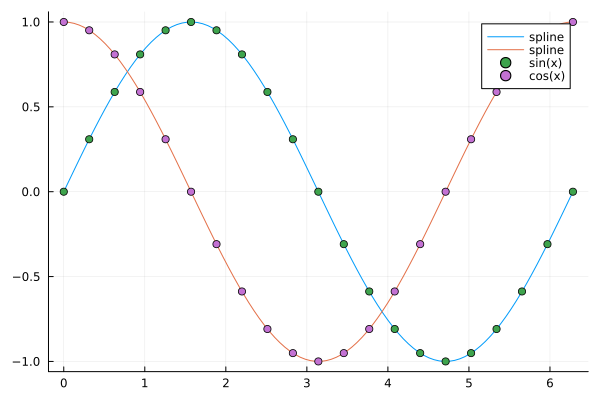

In [ ]:
# example: f = GPECsplines.spline_eval(spline, 3.2)
# plot the spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = JPEC.SplinesMod.spline_eval(spline, xs_fine)
plot(xs_fine, fs_fine, label="spline", legend=:topright)
# plot the input data scatter
scatter!(xs, fs, label="sin(x)", legend=:topright)
scatter!(xs, fc, label="cos(x)", legend=:topright)

In [4]:
# Make e^-ix and e^ix spline
xs = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
fm = exp.(-im .* xs)
fp = exp.(im .* xs)
# Make a vector of vectors of (100,2) for the spline
fs_matrix = hcat(fm, fp)

spline = JPEC.SplinesMod.spline_setup(xs, fs_matrix, 2)


JPEC.SplinesMod.CubicSpline.ComplexSplineType(Ptr{Nothing} @0x0000000138ca24f0, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], ComplexF64[1.0 - 0.0im 1.0 + 0.0im; 0.9458172417006346 - 0.32469946920468346im 0.9458172417006346 + 0.32469946920468346im; … ; 0.9458172417006346 + 0.32469946920468373im 0.9458172417006346 - 0.32469946920468373im; 1.0 + 2.4492935982947064e-16im 1.0 - 2.4492935982947064e-16im], 19, 2, 0, 2)

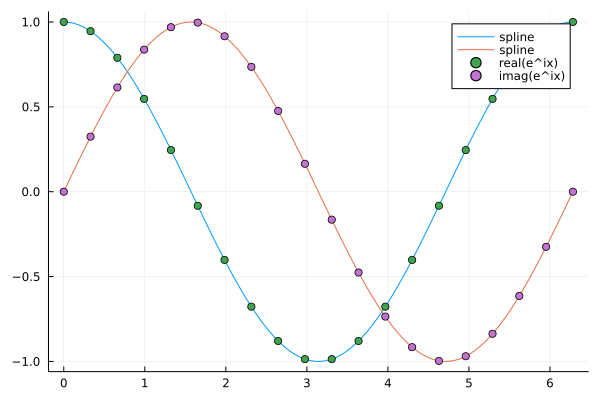

In [5]:
# example: f = GPECsplines.spline_eval(spline, 3.2)
# plot the spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = JPEC.SplinesMod.spline_eval(spline, xs_fine)

# plot just the real part of e^(+ix)
plot(xs_fine, real(fs_fine[:, 2]), label="spline", legend=:topright)
# and the imaginary part
plot!(xs_fine, imag(fs_fine[:, 2]), label="spline", legend=:topright)
# plot the input data scatter
scatter!(xs, real(fs_matrix[:, 2]), label="real(e^ix)", legend=:topright)
scatter!(xs, imag(fs_matrix[:, 2]), label="imag(e^ix)", legend=:topright)

In [6]:
# make a bicubic spline of a 2d periodic function
xs = range(0.0, stop=2*pi, length=20)
ys = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
ys = collect(ys)
fs1 = sin.(xs') .* cos.(ys) .+ 1.0
fs2 = cos.(xs') .* sin.(ys) .+ 1.0
fs = zeros(20, 20, 2)
# fs is a 20x20x2 array
fs[:, :, 1] = fs1
fs[:, :, 2] = fs2
println("fs size: ", size(fs))

# Make a bicubic spline
bcspline = JPEC.SplinesMod.bicube_setup(xs, ys, fs, 2, 2)

fs size: (20, 20, 2)


JPEC.SplinesMod.BicubicSpline.BicubicSplineType(Ptr{Nothing} @0x000000012109ee00, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [1.0 1.3246994692046834 … 0.6753005307953163 0.9999999999999998; 1.0 1.3071063563448337 … 0.6928936436551658 0.9999999999999998; … ; 1.0 1.3071063563448337 … 

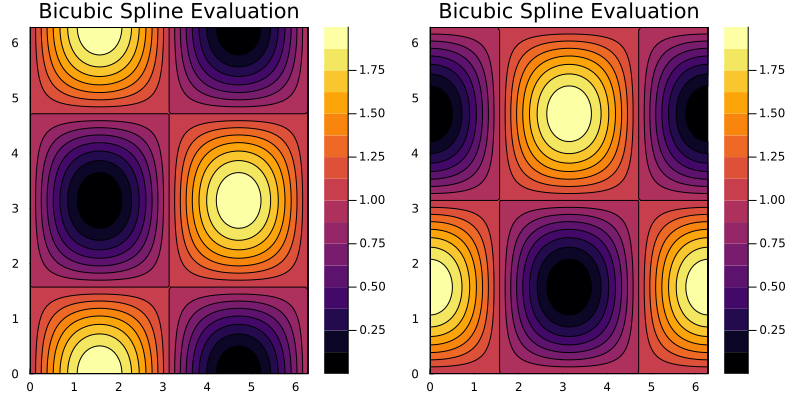

In [7]:
# Evaluate the bicubic spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
ys_fine = collect(range(0.0, stop=2*pi, length=100))
# fs_fine, fsx_fine, fsy_fine, fsxx_fine, fsxy_fine, fsyy_fine = JPEC.SplinesMod.bicube_eval(bcspline, xs_fine, ys_fine, 2)
fs_fine, fsx_fine, fsy_fine = JPEC.SplinesMod.bicube_eval(bcspline, xs_fine, ys_fine, 1)

# plot the bicubic spline
p1 = contourf(xs_fine, ys_fine, fs_fine[:, :, 1], label="sin(x)cos(y)+1", legend=:topright)
p2 = contourf(xs_fine, ys_fine, fs_fine[:, :, 2], label="cos(x)sin(y)+1", legend=:topright)
plot(p1, p2, layout=(1, 2), size=(800, 400), title="Bicubic Spline Evaluation")

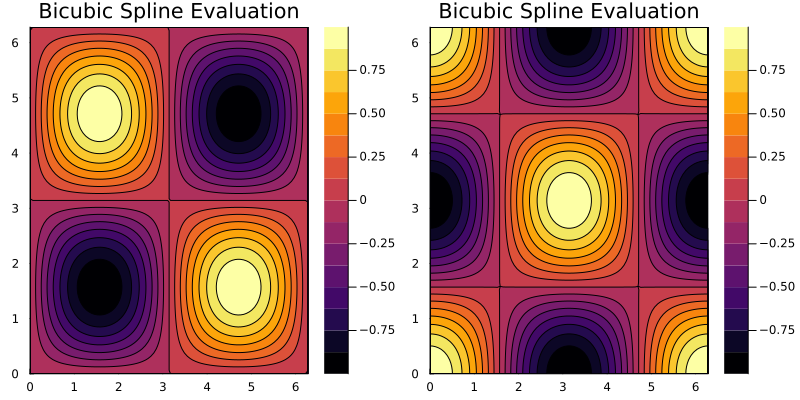

In [8]:
# plot the derivatives
p1 = contourf(xs_fine, ys_fine, fsx_fine[:, :, 1], label="derivative w.r.t x", legend=:topright)
p2 = contourf(xs_fine, ys_fine, fsy_fine[:, :, 1], label="derivative w.r.t y", legend=:topright)
plot(p1, p2, layout=(1, 2), size=(800, 400), title="Bicubic Spline Evaluation")